<a href="https://colab.research.google.com/github/amirtare/The-Sparks-Foundation-Tasks/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis - Retail
Target : find out the weak areas where you can work to make more profit.

Author: Amir Tarek

#libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

#Data

In [2]:
path = '/content/drive/MyDrive/SampleSuperstore.csv'
data = pd.read_csv(path)
print("Data imported successfully!")

Data imported successfully!


In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#Check  nanvalues

In [4]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#Data shape

In [5]:
data.shape

(9994, 13)

#Data columns names

In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#Data types

In [7]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#Dataset Summary

In [8]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#Data Cleaning

#Duplicated rows

In [9]:
data.duplicated().sum()

17

In [10]:
data = data.loc[~data.duplicated()]   #data without duplicated row

now let's check shape of our data again

In [11]:
data.shape

(9977, 13)

previously we got 9994 rows and after detected 17 duplicated rows & deleting them, we've left with 9977 remainig rows.

#Unique Values in each coulmns

In [12]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#Deleting unwanted columns

In [13]:
col_name = ['Country','Postal Code']
data = data.drop(columns=col_name,axis=1)

#Visualization of the data set

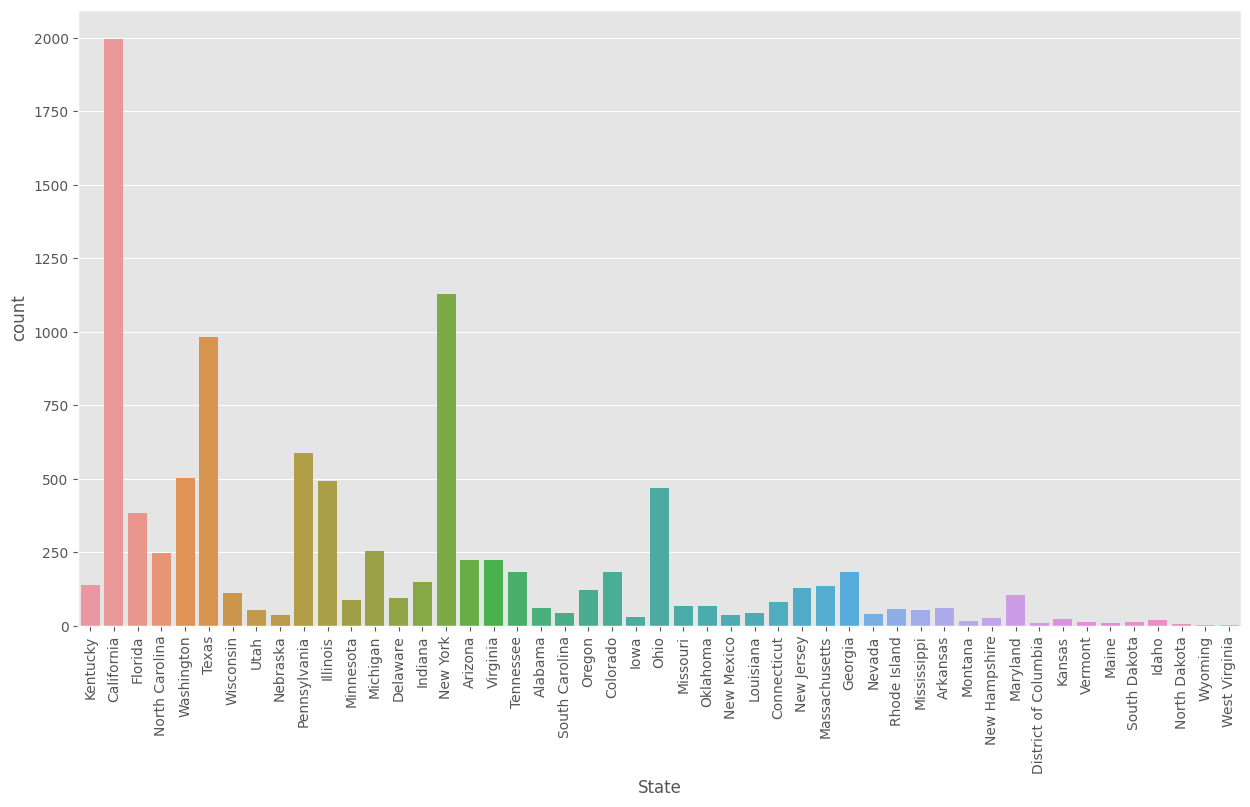

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

we can see the varations of number of orders from on state to another! 

#Correlation of dataset

In [15]:
data.corr()

<ipython-input-15-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<ipython-input-16-0cb99819db6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


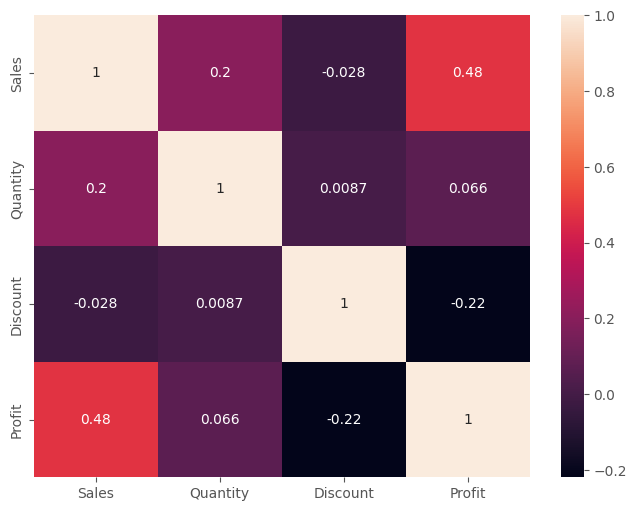

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

We can clearly see that "Sales" and "Discount" have a direct impact on our "Profit," with Sales showing a positive correlation and Discount showing a negative correlation ,respectively. This is expected because as sales rise, profits rise as well, and as discounts are offered on sales, profit margins fall.

#Answering questions using plot
what are the weak areas where you can wort to make more profit?

In [17]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
data['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

We can see clearly that south region got lowest orders!
so **We can grow more in the south regin** and make more facilties for people out there.

#States in south region

In [19]:
data[data['Region']=='South']['State'].unique()

array(['Kentucky', 'Florida', 'North Carolina', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Louisiana', 'Georgia', 'Mississippi',
       'Arkansas'], dtype=object)

#count from different states again!

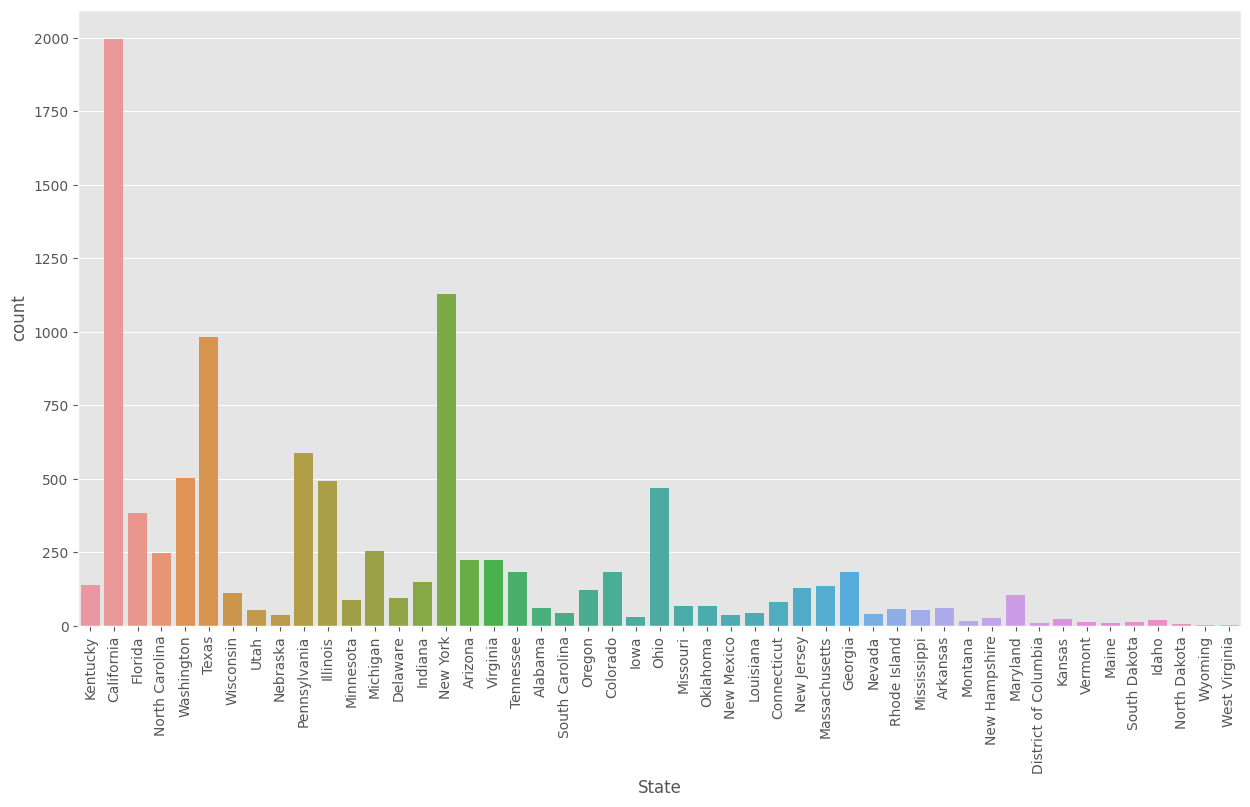

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

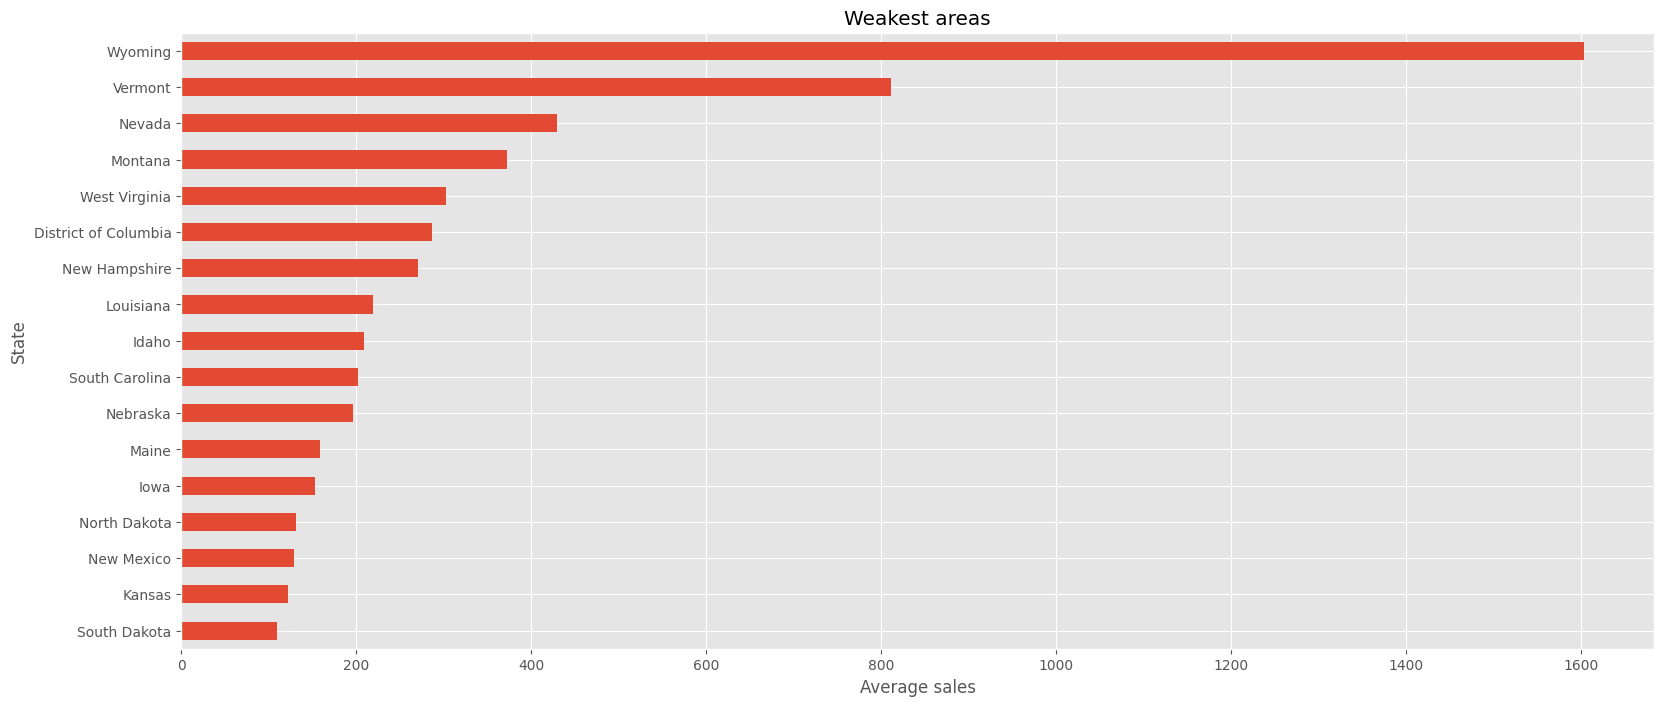

In [21]:
ax = data.groupby('State')['Sales'] \
  .agg(['mean','count'])\
  .query('count <= 50 ')\
  .sort_values('mean')['mean']\
  .plot(kind='barh',figsize=(19,8),title='Weakest areas')
ax.set_xlabel('Average sales')
plt.show()

There are the weakest areas where we can work to get more profits!

Thanks :)